In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

<function matplotlib.pyplot.show(*args, **kw)>

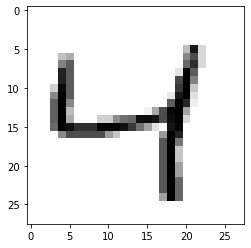

In [3]:
plt.imshow(x_train[2],cmap = 'gray_r')
#if cmap isnot mentioned it will give coloured imaage
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

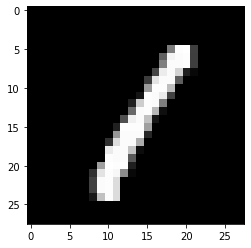

In [4]:
plt.imshow(x_train[3],cmap = 'gray')
plt.show

In [5]:
model = tf.keras.models.Sequential()

In [6]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,input_shape = x_train.shape[1:],
                                activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [7]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 152us/sample - loss: 1.5903 - accuracy: 0.8741
Epoch 2/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3269 - accuracy: 0.9263
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2202 - accuracy: 0.9435
Epoch 4/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1675 - accuracy: 0.9545
Epoch 5/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1428 - accuracy: 0.9603


In [8]:
y_pred = model.predict_classes(x_test)

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test)

array([[ 963,    0,    9,    0,    3,    1,    4,    1,    3,    9],
       [   1, 1108,    2,    0,    0,    1,    3,    8,    1,    5],
       [   1,    1,  955,    5,    1,    0,    0,   11,    2,    1],
       [   2,    0,   17,  988,    0,   61,    0,    5,   13,   14],
       [   0,    2,    8,    0,  953,    3,    1,    1,    5,   25],
       [   1,    1,    0,    2,    1,  779,    3,    0,    1,    2],
       [   4,    9,   14,    0,   11,   19,  943,    0,   10,    1],
       [   4,    8,   16,    6,    4,    1,    0,  989,    6,   13],
       [   3,    6,    8,    8,    3,   21,    4,    5,  931,   11],
       [   1,    0,    3,    1,    6,    6,    0,    8,    2,  928]],
      dtype=int64)

In [10]:
image = x_test[2]
i = cv2.resize(image,(28,28)).reshape(1,28,28)
model.predict_classes(i)

array([1], dtype=int64)

In [11]:
model.save('digit_final_project.h5')

In [12]:
m_new = tf.keras.models.load_model('digit_project.h5')

In [13]:
m_new.predict_classes(i)

array([1], dtype=int64)

In [20]:
img = np.ones((600,600),dtype='uint8')*255
img[100:500,100:500] = 0
windowName = 'Digits Identification'
cv2.namedWindow(windowName)

In [21]:
state = False 
def draw_type(event,x,y,a,b):
        global state
        if event == cv2.EVENT_LBUTTONDOWN:
            state = True
            cv2.circle(img,(x,y),10,(255,255,255),-1)
        elif event == cv2.EVENT_MOUSEMOVE:
            if state == True:
                cv2.circle(img,(x,y),10,(255,255,255),-1)
        else:
            state = False 
cv2.setMouseCallback(windowName,draw_type)
while True:
    cv2.imshow(windowName,img)
    key = cv2.waitKey(1) 
    if key == 27: 
        break
    elif key == 8:
        img[100:500,100:500] = 0
    elif key == 32:
        final_image = img[100:500,100:500]
        i = cv2.resize(final_image,(28,28)).reshape(1,28,28)
        print(m_new.predict_classes(i))
cv2.destroyAllWindows()

[4]
[9]
